# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [ ]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)
1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [ ]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 6.31MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /content/test.csv
100% 218k/218k [00:00<00:00, 3.07MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 42.7MB/s]


In [ ]:
data = pd.read_csv('./train.csv')

1) Посмотрим на несколько первых строк таблицы

Первые три столбца представляют собой численные данные,  остальные категориальные

In [ ]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


Проверим есть ли пустые значения с помощью info

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Числовой признак TotalSpent имеет тип object

Дальнейшая проверка показала, что есть пустые строки

Преобразуем к float

In [ ]:
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors = 'coerce')
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

2) Выбрасываем None
Сохраняем преобразованные данные для catbost

In [ ]:
data.dropna(inplace = True)
print(data.info())

cb_data = data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5273 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5273 non-null   int64  
 1   MonthlySpending           5273 non-null   float64
 2   TotalSpent                5273 non-null   float64
 3   Sex                       5273 non-null   object 
 4   IsSeniorCitizen           5273 non-null   int64  
 5   HasPartner                5273 non-null   object 
 6   HasChild                  5273 non-null   object 
 7   HasPhoneService           5273 non-null   object 
 8   HasMultiplePhoneNumbers   5273 non-null   object 
 9   HasInternetService        5273 non-null   object 
 10  HasOnlineSecurityService  5273 non-null   object 
 11  HasOnlineBackup           5273 non-null   object 
 12  HasDeviceProtection       5273 non-null   object 
 13  HasTechSupportAccess      5273 non-null   object 
 14  HasOnlin

In [ ]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

# 1) Гистограммы для численных признаков:

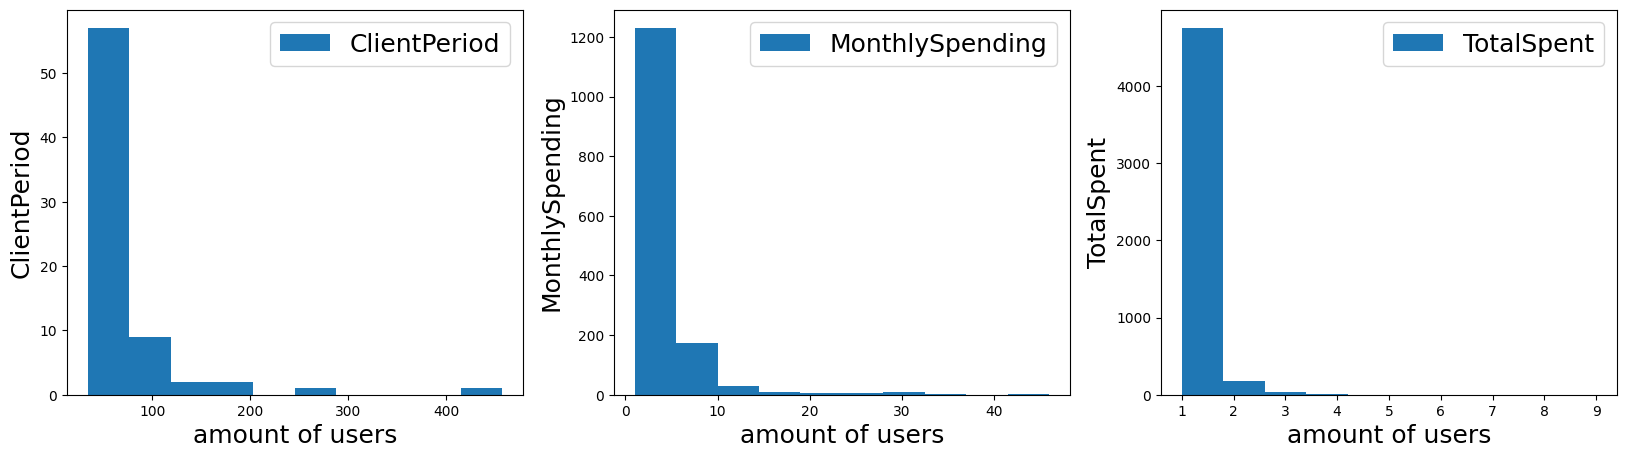

In [ ]:
for i in range(len(num_cols)):
    plt.subplot(1,3,i+1)

    ax = data[num_cols[i]].value_counts().plot(kind = "hist",figsize=(20,5), label = num_cols[i])
    ax.set_xlabel('amount of users',fontsize = 18)
    ax.set_ylabel(num_cols[i],fontsize = 18)
    plt.legend(fontsize = 18)

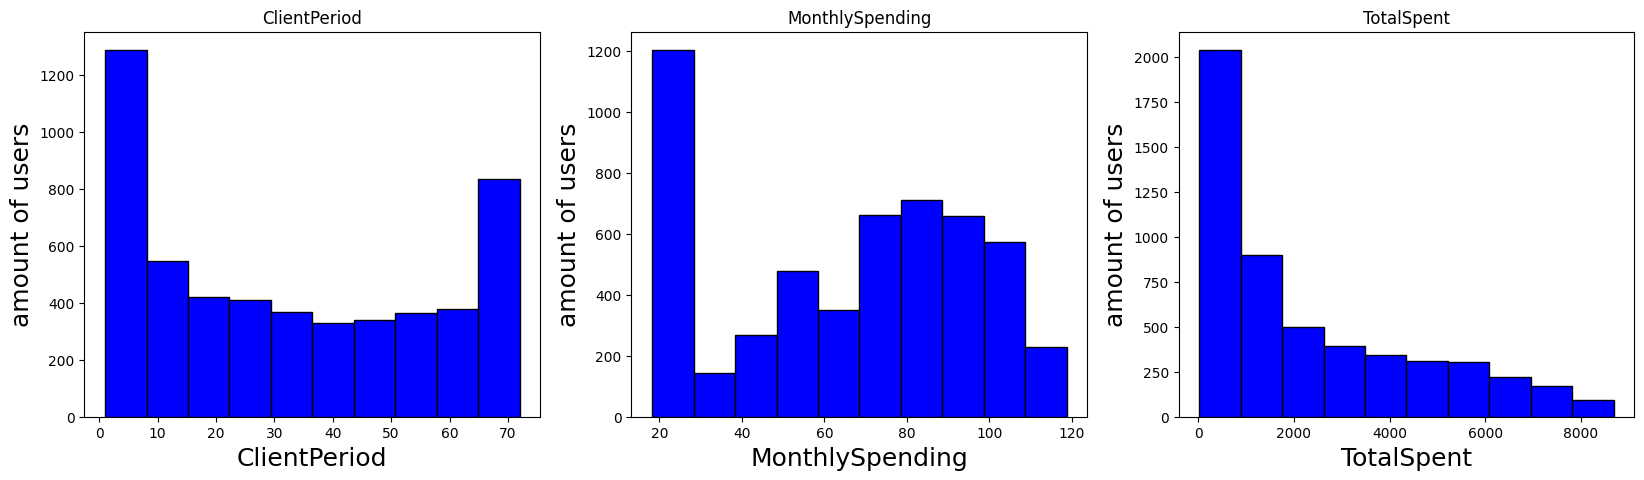

In [ ]:
plt.figure(figsize=(20,5))
for i in range(len(num_cols)):
    ax = plt.subplot(1,3,i+1)
    ax.hist(data[num_cols[i]], color = 'blue', edgecolor = 'black', bins=10)
    ax.set_xlabel(num_cols[i],fontsize = 18)
    ax.set_ylabel('amount of users',fontsize = 18)
    ax.set_title(num_cols[i])

# Диаграмма размаха для численных признаков

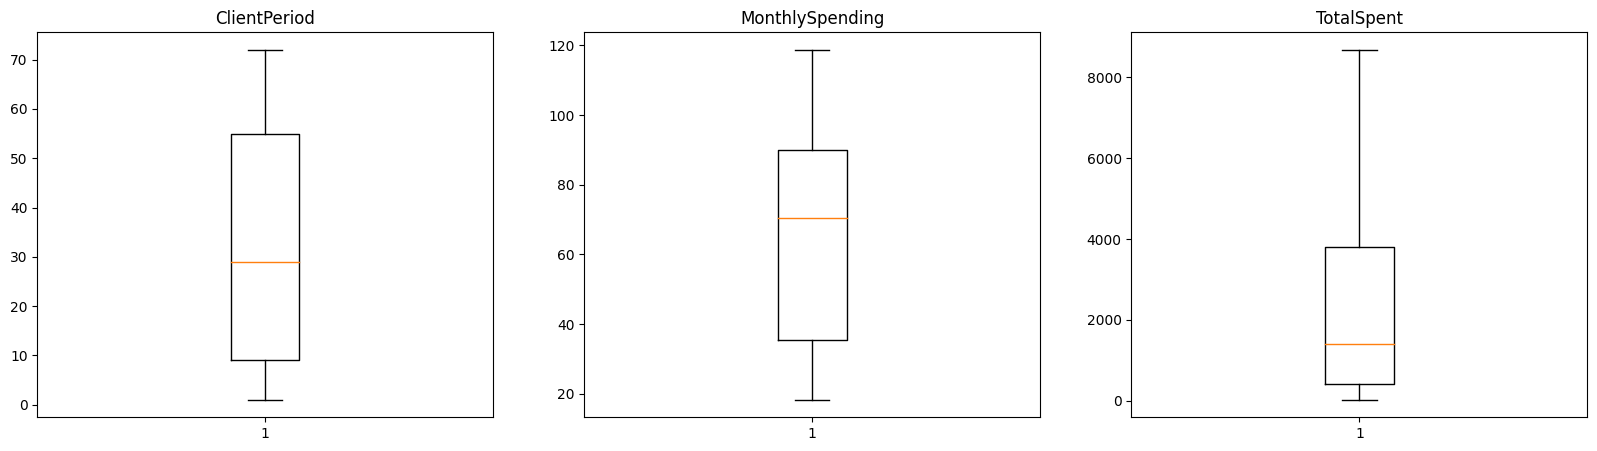

In [ ]:
plt.figure(figsize=(20,5))
for i in range(len(num_cols)):
    ax = plt.subplot(1,3,i+1)
    ax.boxplot(data[num_cols[i]])
    ax.set_title(num_cols[i])

# Круговые диаграммы для категориальных признаков

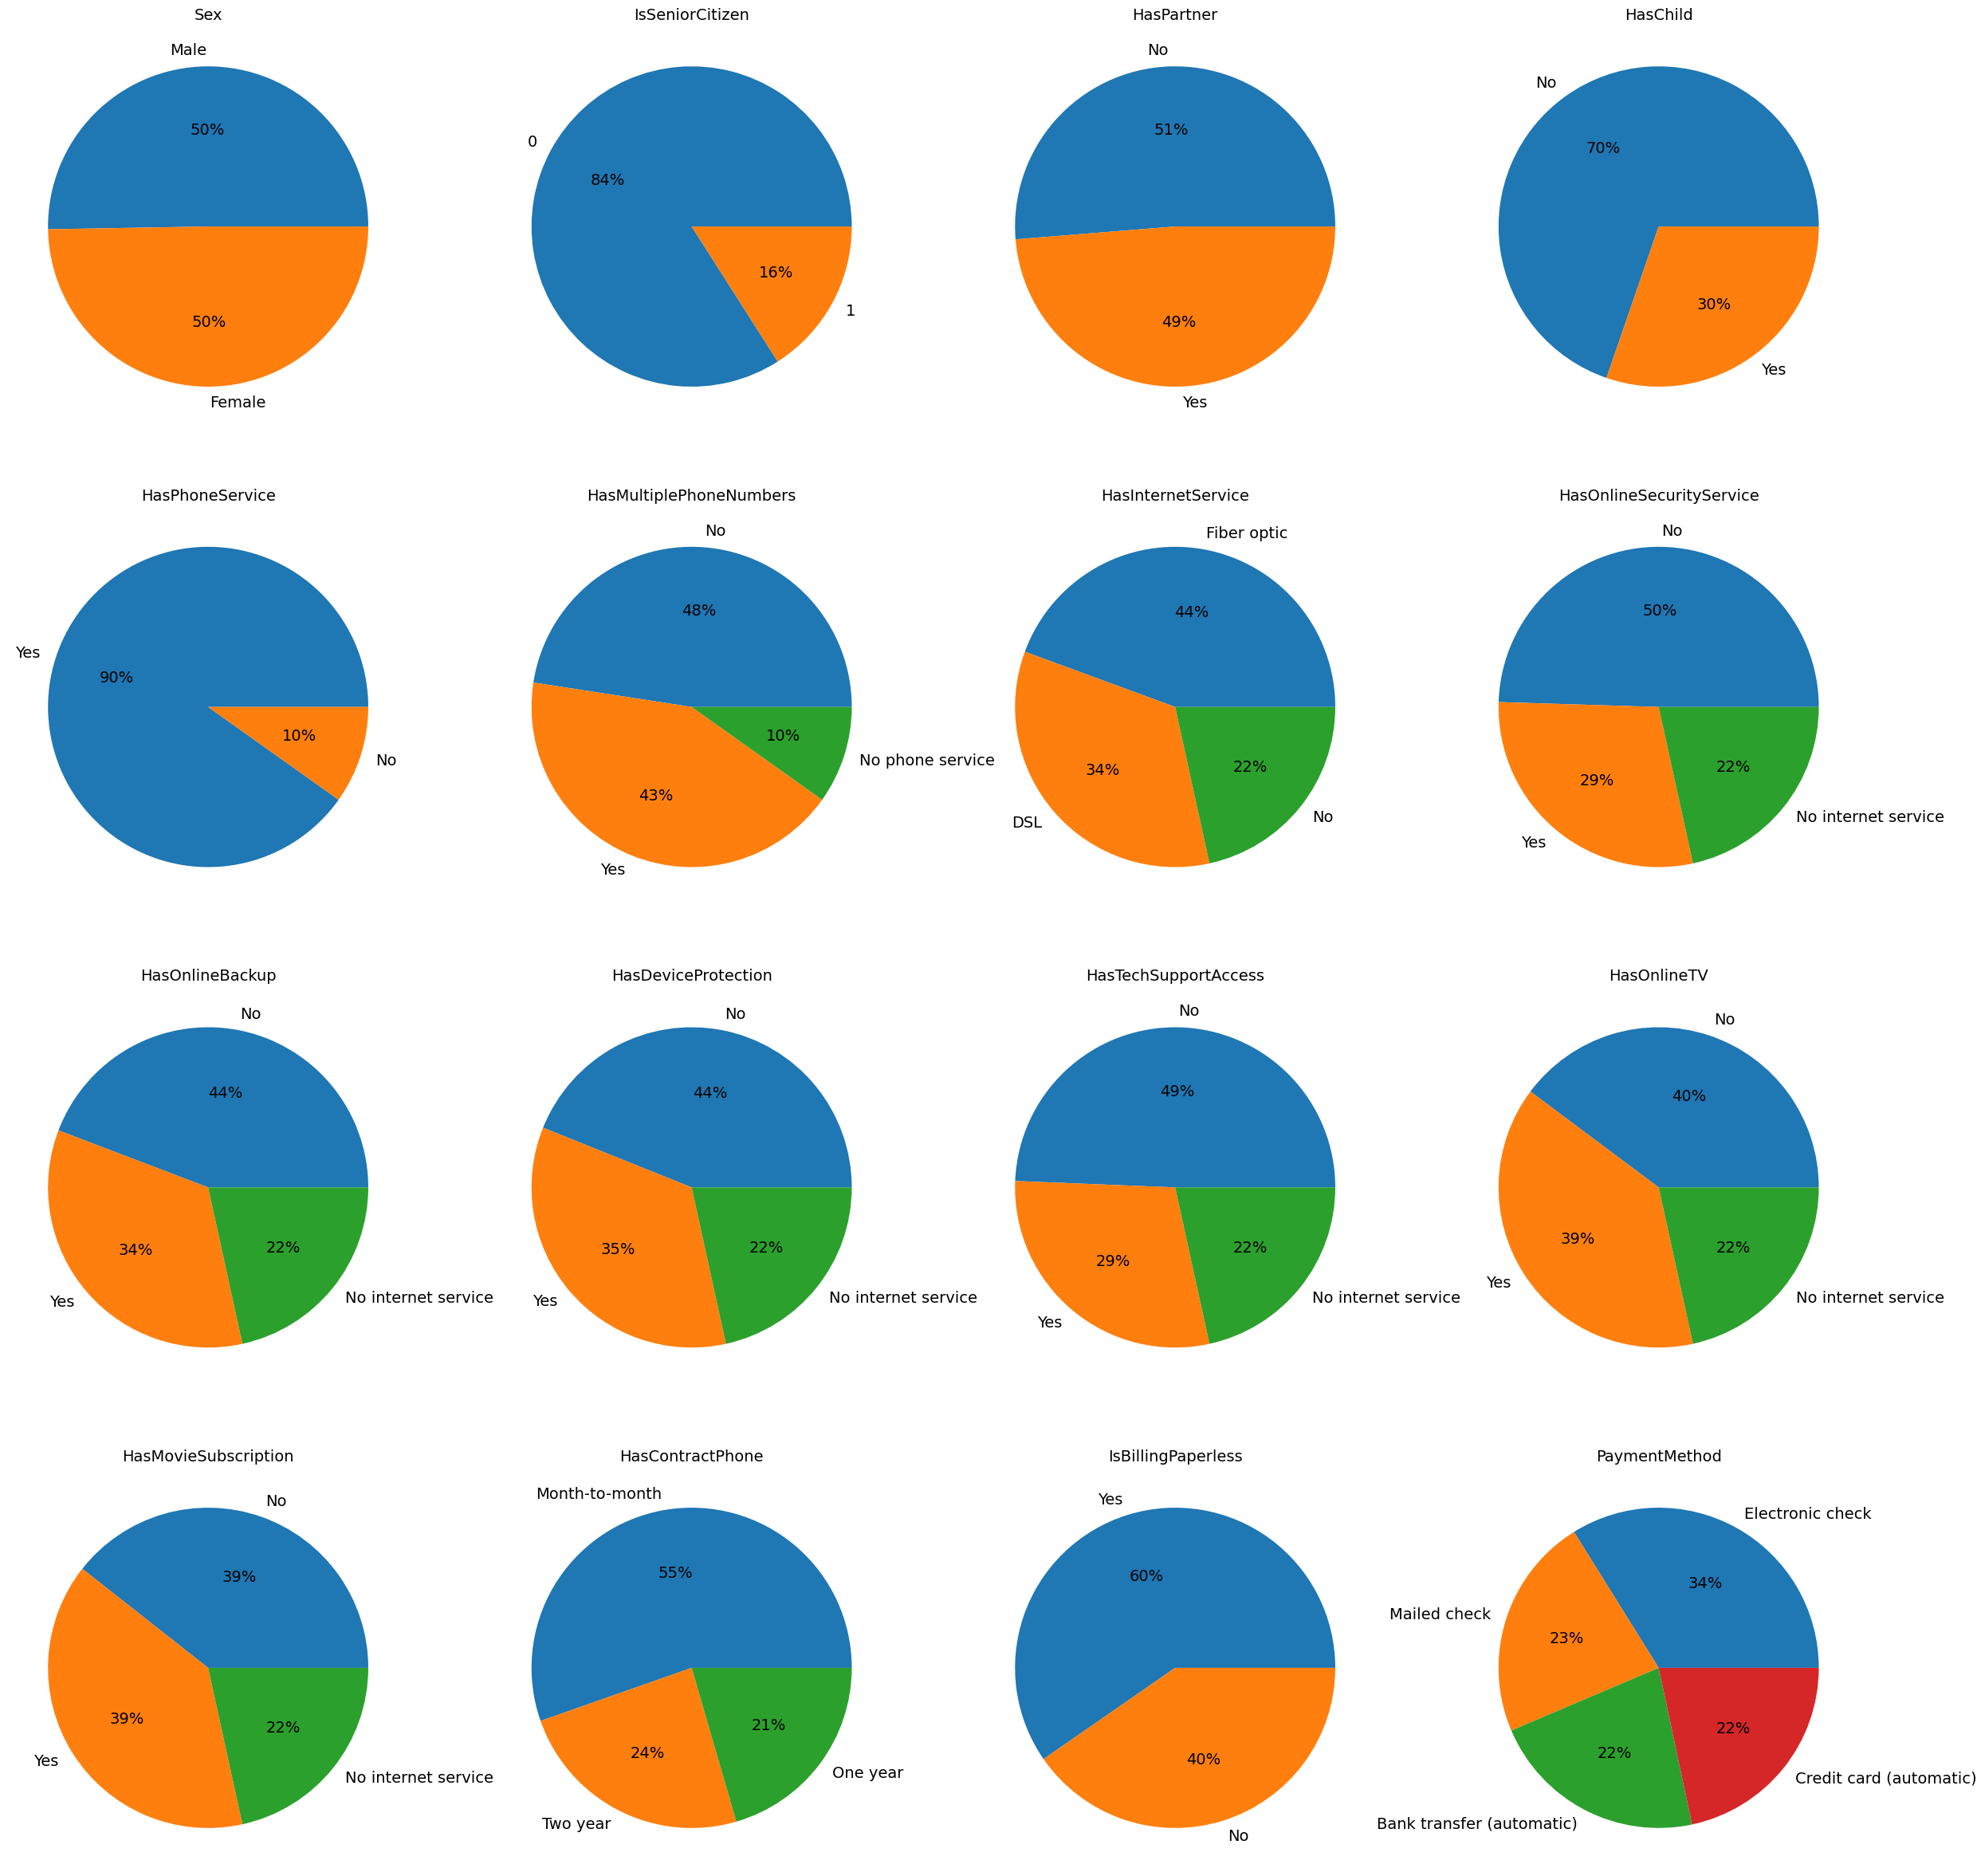

In [ ]:
for i in range(len(cat_cols)):
    plt.subplot(4,4,i+1)
    ax = data[cat_cols[i]].value_counts().plot(kind = "pie",figsize=(30,30), autopct='%1.0f%%',  textprops={'fontsize': 14})
    plt.title(cat_cols[i], fontsize = 14)
    ax.set(ylabel='', aspect='equal')

# 2) Распределение целевой переменной
Класс 0 занимает 74%

Класс 1 26%

Классы сбалансированные, так как разница менее чем в 20 раз

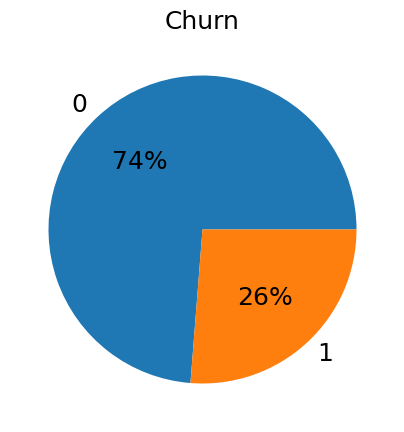

In [ ]:
ax = data['Churn'].value_counts().plot(kind = "pie",figsize=(5,5), autopct='%1.0f%%',  textprops={'fontsize': 18})
plt.title('Churn', fontsize = 18)
ax.set(ylabel='', aspect='equal');

Вывод: данные сбалансированные и в изменениях необходимости нет

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

# Обработка данных
Для категориальных признаков произведем one-hot encoding

y - целевая переменная

X - вектор признаков

In [ ]:
y = data['Churn']

categorial_data = data[cat_cols]

numerical_data = data[num_cols]

dummy_features = pd.get_dummies(categorial_data,dtype="int64")
X = pd.concat([numerical_data, dummy_features], axis = 1)

Разобьем выборку на тестовую и обучающую части и проведем нормирование данных

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Подбор гиперпараметров

С помощью LogisticRegressionCV

In [ ]:
CV_model = LogisticRegressionCV(scoring='roc_auc', refit=True, cv=5,n_jobs=-1, Cs= [0.001, 0.01, 0.05, 0.1, 1., 100.])
CV_model.fit(X_train_scaled, y_train)
y_train_predicted =CV_model.predict_proba(X_train_scaled)[:, 1]
y_test_predicted =CV_model.predict_proba(X_test_scaled)[:, 1]
train_auc = roc_auc_score(y_train, y_train_predicted)
print(train_auc)
test_auc = roc_auc_score(y_test, y_test_predicted)
print(test_auc)

print(CV_model.coef_)
print(CV_model.intercept_)

0.8497466349090305
0.8437461665487144
[[-1.55106252e+00 -2.33398633e+00  8.50969284e-01  1.13175682e-01
   2.38245427e-03 -2.38245427e-03  1.35665903e-03 -1.35665903e-03
   2.78183290e-02 -2.78183290e-02 -1.27244320e-01  1.27244320e-01
  -1.51060341e-01 -1.27244320e-01  2.29587047e-01 -5.44345964e-01
   7.01357366e-01 -2.21920936e-01  1.26469640e-01 -2.21920936e-01
   6.17190602e-02  6.56346464e-02 -2.21920936e-01  1.23488873e-01
   1.86150922e-02 -2.21920936e-01  1.72318050e-01  1.11555800e-01
  -2.21920936e-01  7.78374871e-02 -1.30116577e-01 -2.21920936e-01
   3.18741403e-01 -1.18134415e-01 -2.21920936e-01  3.05943672e-01
   3.09097224e-01 -5.33306817e-02 -3.08920050e-01 -9.05646757e-02
   9.05646757e-02 -1.78124771e-02 -8.98202609e-02  1.21653211e-01
  -3.18533540e-02]]
[-1.76818194]


train_auc = 0.8497466349090305,

test_auc = 0.8437461665487144

Параметры логистической регрессии выше

# Подбор гиперпараметров
С помощью GridSearchCV

In [ ]:
grid = {'C': [100, 10, 1, 0.1, 0.01, 0.001], 'penalty': ['l2']}
# C and penalty are logistic regression regularization parameters
# If C is too small model is underfitted, if C is too big model is overfitted.
# l1 and l2 are regularization loss functions (l1=lasso, l2=ridge)
clf = make_pipeline(StandardScaler(),
                    GridSearchCV(LogisticRegression(),
                                 param_grid=grid,
                                 cv=5,
                                 refit=True))

# Training the model:
clf.fit(X_train, y_train)

y_train_predicted =clf.predict_proba(X_train_scaled)[:, 1]
y_test_predicted =clf.predict_proba(X_test_scaled)[:, 1]
train_auc = roc_auc_score(y_train, y_train_predicted)
print(train_auc)
test_auc = roc_auc_score(y_test, y_test_predicted)
print(test_auc)

0.734021746423217
0.7374286388299126


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Лучшее качество удалось получить с помощью LogisticRegrationCv

roc_auc = 0.8437461665487144

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [ ]:
!pip3 install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.3 MB/s eta 0:00:00


In [ ]:
import catboost

Найдем оптимальные гиперпараметры

In [ ]:
CBC = catboost.CatBoostClassifier(cat_features=[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18], eval_metric='AUC')
parameters = {
            'n_estimators' : [i for i in range(50, 500, 50)],
            'depth'         : [4,5,6,7,8],
            'learning_rate' : [0.01,0.02,0.03,0.04, 0.1, 0.2, 0.3],
            }
Grid_CBC = GridSearchCV(estimator=CBC, param_grid = parameters, cv = 2, n_jobs=-1)

Разобьем данные на тестовую и обучающую выборки

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cb_data.iloc[:,:-1], cb_data.Churn, train_size=0.8,random_state=42)
Grid_CBC.fit(X_train, y_train)

0:	total: 64.3ms	remaining: 16s
1:	total: 74.8ms	remaining: 9.27s
2:	total: 84.5ms	remaining: 6.96s
3:	total: 93.8ms	remaining: 5.77s
4:	total: 102ms	remaining: 4.97s
5:	total: 111ms	remaining: 4.5s
6:	total: 120ms	remaining: 4.17s
7:	total: 129ms	remaining: 3.89s
8:	total: 136ms	remaining: 3.63s
9:	total: 144ms	remaining: 3.46s
10:	total: 153ms	remaining: 3.33s
11:	total: 161ms	remaining: 3.2s
12:	total: 170ms	remaining: 3.1s
13:	total: 178ms	remaining: 3s
14:	total: 187ms	remaining: 2.92s
15:	total: 194ms	remaining: 2.84s
16:	total: 203ms	remaining: 2.78s
17:	total: 211ms	remaining: 2.72s
18:	total: 219ms	remaining: 2.66s
19:	total: 226ms	remaining: 2.6s
20:	total: 234ms	remaining: 2.55s
21:	total: 242ms	remaining: 2.5s
22:	total: 259ms	remaining: 2.55s
23:	total: 272ms	remaining: 2.56s
24:	total: 280ms	remaining: 2.52s
25:	total: 287ms	remaining: 2.47s
26:	total: 293ms	remaining: 2.42s
27:	total: 300ms	remaining: 2.38s
28:	total: 308ms	remaining: 2.35s
29:	total: 314ms	remaining: 2.

GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostClassifier object at 0x7a7552758c70>,
             n_jobs=-1,
             param_grid={'depth': [4, 5, 6, 7, 8],
                         'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.1, 0.2,
                                           0.3],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400,
                                          450]})

In [ ]:
y_train_predicted = Grid_CBC.predict_proba(X_train)[:, 1]
y_test_predicted = Grid_CBC.predict_proba(X_test)[:, 1]
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)
print(train_auc)
print(test_auc)

0.8633630203224194
0.8440976645435245



Лучшее качество для catbost

на обучающей: 0.8633630203224194

на тестовой: 0.8440976645435245

Лучшие параметры

In [ ]:
Grid_CBC.best_estimator_.get_params()

{'learning_rate': 0.04,
 'depth': 4,
 'eval_metric': 'AUC',
 'n_estimators': 250,
 'cat_features': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]}

# Предсказания

In [ ]:
best_model = Grid_CBC

In [ ]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:,-1]
submission.to_csv('./my_submission.csv', index=False)
submission_final = pd.read_csv('./my_submission.csv')